In [1]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

In [3]:
input_dir = "/work/gallim/devel/CQRRelatedStudies/NormalizingFlow/samples/mc_uncorr/DYJetsToLL_M-50_TuneCP5_13TeV-amcatnloFXFX-pythia8/nominal"
input_dir_data = "/work/gallim/devel/CQRRelatedStudies/NormalizingFlow/samples/data/DoubleEG/nominal"
files = [f"{input_dir}/{f}" for f in os.listdir(input_dir)][:100]
files_data = [f"{input_dir_data}/{f}" for f in os.listdir(input_dir_data)][:100]
print(len(files))

df = dd.read_parquet(files).compute()
df = df[np.abs(df.probe_eta) < 1.4442]
df_data = dd.read_parquet(files_data).compute()
df_data = df_data[np.abs(df_data.probe_eta) < 1.4442]

100


In [3]:
df.columns

Index(['tag_chargedHadronIso', 'tag_eCorr', 'tag_energyErr', 'tag_energyRaw',
       'tag_esEffSigmaRR', 'tag_esEnergyOverRawE', 'tag_eta', 'tag_etaWidth',
       'tag_hoe', 'tag_mass', 'tag_mvaID_Fall17V1p1', 'tag_pfChargedIsoPFPV',
       'tag_pfChargedIsoWorstVtx', 'tag_pfPhoIso03', 'tag_pfRelIso03_all',
       'tag_pfRelIso03_chg', 'tag_phi', 'tag_phiWidth', 'tag_pt', 'tag_r9',
       'tag_s4', 'tag_sieie', 'tag_sieip', 'tag_trkSumPtHollowConeDR03',
       'tag_x_calo', 'tag_y_calo', 'tag_z_calo', 'tag_charge', 'tag_cutBased',
       'tag_cutBased_Fall17V1Bitmap', 'tag_electronIdx', 'tag_jetIdx',
       'tag_pdgId', 'tag_vidNestedWPBitmap', 'tag_electronVeto',
       'tag_isScEtaEB', 'tag_isScEtaEE', 'tag_mvaID_WP80', 'tag_mvaID_WP90',
       'tag_pixelSeed', 'tag_seedGain', 'tag_genPartIdx', 'tag_genPartFlav',
       'tag_cleanmask', 'tag_electronIdxG', 'tag_genPartIdxG', 'tag_jetIdxG',
       'tag_fixedGridRhoAll', 'tag_mvaID', 'probe_chargedHadronIso',
       'probe_eCorr', 'pro

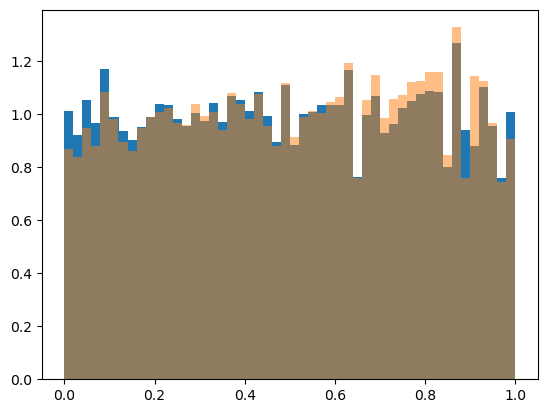

In [13]:
var = 'probe_r9'
pipe = Pipeline(
    [
        #('qt', QuantileTransformer(output_distribution='uniform'))
    ]
)

arr = df_data[var].values
new_arr = pipe.fit_transform(arr.reshape(-1, 1))
arr_mc = df[var].values
new_arr_mc = pipe.transform(arr_mc.reshape(-1, 1))
plt.hist(new_arr, bins=50, density=True);
plt.hist(new_arr_mc, bins=50, alpha=0.5, density=True);
plt.show()

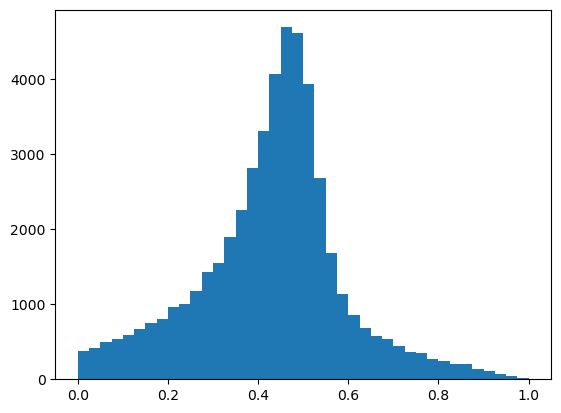

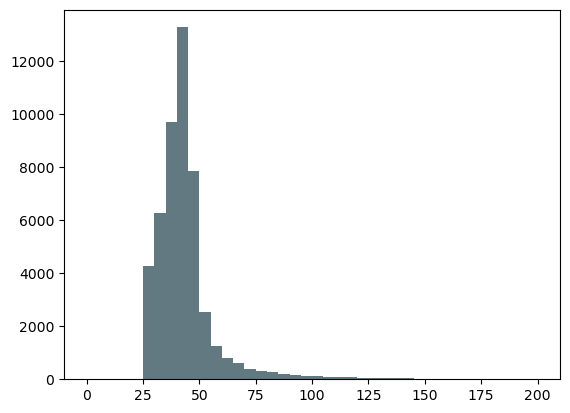

In [36]:
pipe = Pipeline(
    [
        #('log_trans', FunctionTransformer(lambda x: np.log1p(x), inverse_func=lambda x: np.expm1(x))),
        #('log_trans', FunctionTransformer(lambda x: np.log(x*10 + 1e-1), inverse_func=lambda x: (np.exp(x) - 1e-1)/10)),
        #('arctan_trans', FunctionTransformer(lambda x: np.arctan(x - 1.25), inverse_func=lambda x: (np.tan(x) + 1.25))),
        #('square_root', FunctionTransformer(lambda x: np.sqrt(x), inverse_func=lambda x: np.power(x, 2))),
        ('box_cox', PowerTransformer(method='box-cox')),
        ('scaler', MinMaxScaler((0, 1)))
    ]
)

orig_rng = (0, 200)
var = df['probe_pt'].values
new_var = pipe.fit_transform(var.reshape(-1, 1))
plt.hist(new_var, bins=40);
plt.show()
old_var = pipe.inverse_transform(new_var)
plt.hist(var, bins=40, range=orig_rng);
plt.hist(old_var, bins=40, range=orig_rng, alpha=0.3);

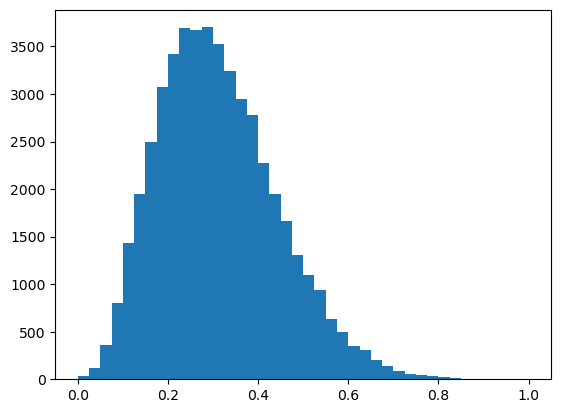

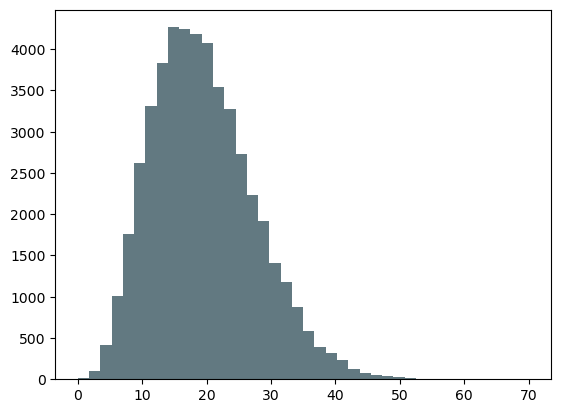

In [9]:
pipe = Pipeline(
    [
        #('log_trans', FunctionTransformer(lambda x: np.log1p(x), inverse_func=lambda x: np.expm1(x))),
        #('log_trans', FunctionTransformer(lambda x: np.log1p(x/5), inverse_func=lambda x: np.expm1(x)*5)),
        ('scaler', MinMaxScaler((0, 1)))
    ]
)

orig_rng = (0, 70)
var = df['probe_fixedGridRhoAll'].values
new_var = pipe.fit_transform(var.reshape(-1, 1))
plt.hist(new_var, bins=40);
plt.show()
old_var = pipe.inverse_transform(new_var)
plt.hist(var, bins=40, range=orig_rng);
plt.hist(old_var, bins=40, range=orig_rng, alpha=0.3);

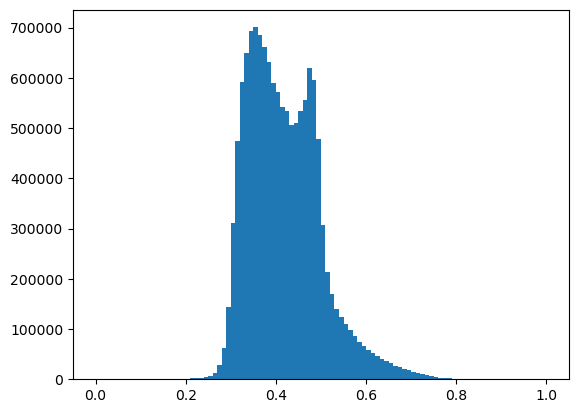

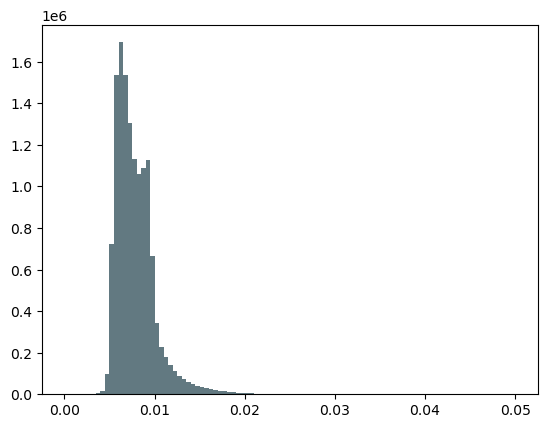

In [125]:
pipe = Pipeline(
            [
                (
                    "arctan_trans",
                    FunctionTransformer(
                        lambda x: np.arctan(x * 100 - 0.15),
                        inverse_func=lambda x: (np.tan(x) + 0.15) / 100,
                    )
                ),
                #("box_cox", PowerTransformer(method="box-cox")),
                ("scaler", MinMaxScaler((0, 1))),
            ]
        )

orig_rng = (0, 0.05)
var = df['probe_etaWidth'].values
new_var = pipe.fit_transform(var.reshape(-1, 1))
plt.hist(new_var, bins=100);
plt.show()
old_var = pipe.inverse_transform(new_var)
plt.hist(var, bins=100, range=orig_rng);
plt.hist(old_var, bins=100, range=orig_rng, alpha=0.3);

/work/gallim/mambaforge/envs/FFF-minimal/lib/python3.8/site-packages/sklearn/preprocessing/_function_transformer.py:184: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


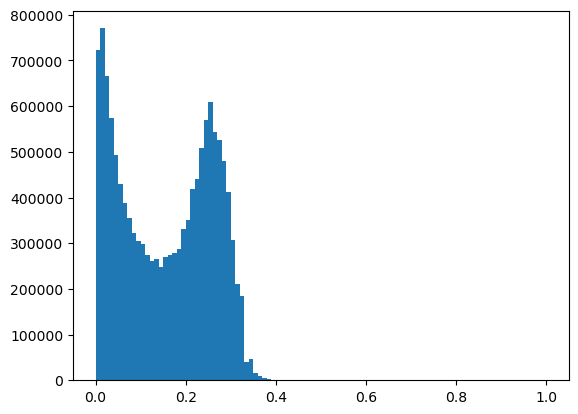

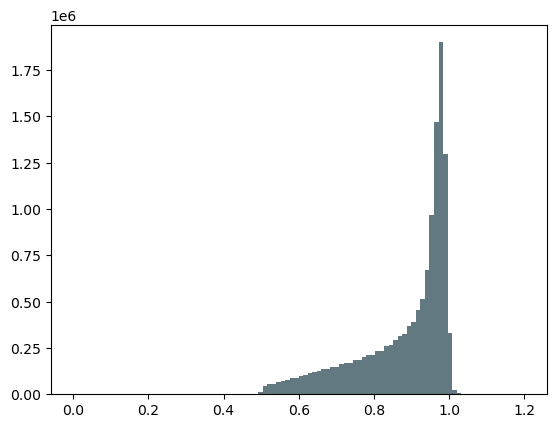

In [132]:
pipe = Pipeline(
            [
                (
                    "log_trans",
                    FunctionTransformer(
                        lambda x: np.log(x + 1e-2),
                        inverse_func=lambda x: np.exp(x) - 1e-2,
                    ),
                ),
                (
                    "arctan_trans",
                    FunctionTransformer(
                        lambda x: np.arctan(x * 10),
                        inverse_func=lambda x: (np.tan(x)) / 10,
                    ),
                ),
                ("box_cox", PowerTransformer()),
                ("scaler", MinMaxScaler((0, 1))),
            ]
        )

orig_rng = (0, 1.2)
var = df['probe_r9'].values
new_var = pipe.fit_transform(var.reshape(-1, 1))
plt.hist(new_var, bins=100);
plt.show()
old_var = pipe.inverse_transform(new_var)
plt.hist(var, bins=100, range=orig_rng);
plt.hist(old_var, bins=100, range=orig_rng, alpha=0.3);

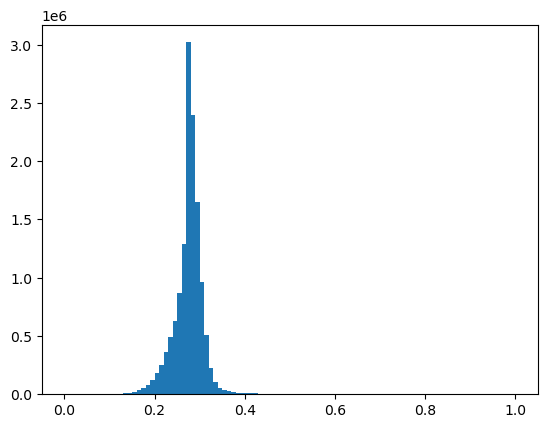

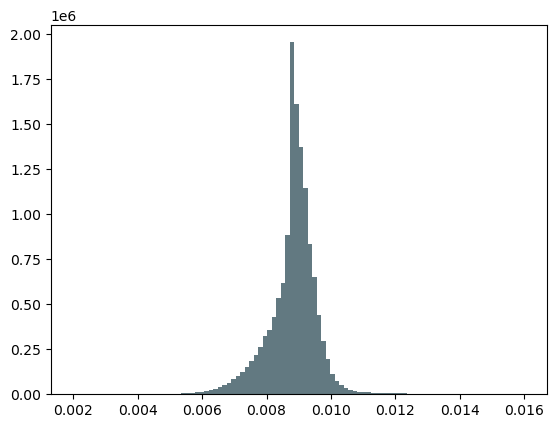

In [165]:
pipe = Pipeline(
            [
                ('ss', FunctionTransformer(lambda x: x*100, inverse_func=lambda x: x/100)),
                ('log_trans', FunctionTransformer(lambda x: np.log1p(x), inverse_func=lambda x: np.expm1(x))),
                ("box_cox", PowerTransformer(method="box-cox")),
                ("scaler", MinMaxScaler((0, 1))),
            ]
        )

orig_rng = (0.002, 0.016)
var = df['probe_sieie'].values
new_var = pipe.fit_transform(var.reshape(-1, 1))
plt.hist(new_var, bins=100);
plt.show()
old_var = pipe.inverse_transform(new_var)
plt.hist(var, bins=100, range=orig_rng);
plt.hist(old_var, bins=100, range=orig_rng, alpha=0.3);